# Fine-Tuning ResNet with Gate Attention Mechanism

A lot of the code is from here: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

* Add [Gated-Attention mechanism](https://arxiv.org/abs/2010.02818)
* Add an option to use [Dilated Conv Block](https://arxiv.org/abs/1606.00915) before the Gated-Attention Mechanism.

Model | Trainable Parameters
----- | --------------
ResNet-18 | 11M
ResNet-34 | 22M
Gated Attention | 3k
Gated Attention + Dilated Block | 12M

## Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd drive/MyDrive/colab_projects/cocoapi/notebooks/

/content/drive/MyDrive/colab_projects/cocoapi/notebooks


## CONFIG

In [65]:
BACKBONE = 'resnet18'
USE_DILATED_BLOCK = True

WEIGHT_DECAY=80

MODEL_NAME = f'gated-attention_dilated-block={USE_DILATED_BLOCK}_{BACKBONE}_wd={WEIGHT_DECAY}_2021-06-30'
print(MODEL_NAME)

gated-attention_dilated-block=True_resnet18_wd=80_2021-06-30


## Model Descriptions

* batch size: 32
* augmentation
    * baseline train transforms: **at the beginning**
        1. resize (224x224)
        2. RandomHorizontalFlip(p=0.5)
        3. Normalize (ImageNet constants)
    * SimCLR train transforms: starting from **strong-aug-longer-Adam-2021-06-14**
        1. resize (224x224) - the only step not like in SimCLR
        2. Random Horizontal Flip
        3. Random  Color Distortion
        4. Random Gaussian Blur
    * dev transforms: **always for dev set**
        1. resize (224x224)
        2. Normalize (ImageNet constants)


### gated-attention_dilated-block=False_resnet18_2021-06-30

**Attention head** training
* **epochs: 8 (0, ..., 7)**
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(**step_size=6**, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3, 4, 5: 1e-2
    * epochs 6, 7: 1e-3
* weight_decay=0
    
All layers training
* epochs: 14 (8, 9, ..., 21)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(**step_size=7**, gamma=0.1)
* learning rate alpha:
    * epochs 8, ..., 14: 1e-4
    * epochs 15, ..., 21: 1e-5
* weight_decay=0

### gated-attention_dilated-block=False_resnet18_wd=1_2021-06-30

**Attention head** training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3, 4, 5: 1e-2
    * epochs 6, 7: 1e-3
* weight_decay=0
    
All layers training
* epochs: 14 (8, 9, ..., 21)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(**step_size=10**, gamma=0.1)
* learning rate alpha:
    * epochs 8, ..., 17: 1e-4
    * epochs 18, ..., 21: 1e-5
* weight_decay=**1**


----
Reasons
* More epochs with larger lr (loss curve flatens too much)
* Overfitting

### gated-attention_dilated-block=False_resnet18_wd=10_2021-06-30


**Attention head** training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3, 4, 5: 1e-2
    * epochs 6, 7: 1e-3
* weight_decay=0
    
All layers training
* epochs: 14 (8, 9, ..., 21)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=10, gamma=0.1)
* learning rate alpha:
    * epochs 8, ..., 17: 1e-4
    * epochs 18, ..., 21: 1e-5
* weight_decay=**10**

Reason: overfitting

### gated-attention_dilated-block=False_resnet18_wd=40_2021-06-30

**Attention head** training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3, 4, 5: 1e-2
    * epochs 6, 7: 1e-3
* weight_decay=0
    
All layers training
* epochs: 14 (8, 9, ..., 21)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=10, gamma=0.1)
* learning rate alpha:
    * epochs 8, ..., 17: 1e-4
    * epochs 18, ..., 21: 1e-5
* **weight_decay=40**

Reason: overfitting

### gated-attention_dilated-block=True_resnet18_wd=0_2021-06-30

**Attention head** training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3, 4, 5: 1e-2
    * epochs 6, 7: 1e-3
* weight_decay=0
    
All layers training
* epochs: 14 (8, 9, ..., 21)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=10, gamma=0.1)
* learning rate alpha:
    * epochs 8, ..., 17: 1e-4
    * epochs 18, ..., 21: 1e-5
* **weight_decay=0**
* **USE_DILATED_BLOCK = True**

Reason: need better representation

### gated-attention_dilated-block=True_resnet18_wd=10_2021-06-30



**Attention head** training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3, 4, 5: 1e-2
    * epochs 6, 7: 1e-3
* weight_decay=0
    
All layers training
* epochs: 14 (8, 9, ..., 21)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=10, gamma=0.1)
* learning rate alpha:
    * epochs 8, ..., 17: 1e-4
    * epochs 18, ..., 21: 1e-5
* **weight_decay=10**
* USE_DILATED_BLOCK = True

Reason: overfitting

### gated-attention_dilated-block=True_resnet18_wd=40_2021-06-30

**Attention head** training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3, 4, 5: 1e-2
    * epochs 6, 7: 1e-3
* weight_decay=0
    
All layers training
* epochs: 14 (8, 9, ..., 21)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=10, gamma=0.1)
* learning rate alpha:
    * epochs 8, ..., 17: 1e-4
    * epochs 18, ..., 21: 1e-5
* **weight_decay=40**
* USE_DILATED_BLOCK = True

Reason: overfitting

### gated-attention_dilated-block=True_resnet18_wd=80_2021-06-30

**Attention head** training
* epochs: 8 (0, ..., 7)
* optimizer: Adam(lr=1e-2)
* scheduler: StepLR(step_size=6, gamma=0.1)
* learning rate alpha:
    * epochs 0, 1, 2, 3, 4, 5: 1e-2
    * epochs 6, 7: 1e-3
* weight_decay=0
    
All layers training
* epochs: 14 (8, 9, ..., 21)
* optimizer: Adam(lr=1e-4)
* scheduler: StepLR(step_size=10, gamma=0.1)
* learning rate alpha:
    * epochs 8, ..., 17: 1e-4
    * epochs 18, ..., 21: 1e-5
* **weight_decay=80**
* USE_DILATED_BLOCK = True

Reason: overfitting

# Before Training

## Imports

In [6]:
import os
import copy

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import torchvision
from torchvision.io import read_image
from torchvision import datasets, models, transforms

from tqdm.notebook import trange, tqdm

from torchsummary import summary

In [7]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [8]:
%cd ./utils/
from dataloaders import CocoNoCropping
from config import CATEGORIES_OF_INTEREST; print(CATEGORIES_OF_INTEREST)
from config import IMG_SIZE; print(IMG_SIZE)
# help(CocoNoCropping) # should not be blank
%cd ..

/content/drive/My Drive/colab_projects/cocoapi/notebooks/utils
['bird', 'cat', 'dog', 'person']
(224, 224)
/content/drive/My Drive/colab_projects/cocoapi/notebooks


In [9]:
%cd ../models/
from george_model import get_resnet, GatedAttentionModule
%cd ../notebooks/

/content/drive/My Drive/colab_projects/cocoapi/models
/content/drive/My Drive/colab_projects/cocoapi/notebooks


## Transforms, Datasets, and Data Loaders

In [10]:
# Strong augmentation from SimCLR (Appendix A. Data Augmentation Details)
# https://arxiv.org/pdf/2002.05709.pdf

def get_color_distortion(s=1.0):
    # s is the strength of color distortion.
    color_jitter = transforms.ColorJitter(0.8*s, 0.8*s, 0.8*s, 0.2*s)
    rnd_color_jitter = transforms.RandomApply([color_jitter], p=0.8)
    rnd_gray = transforms.RandomGrayscale(p=0.2) # keeps nummber of channels
    color_distort = torch.nn.Sequential(
        rnd_color_jitter,
        rnd_gray)
    
    return color_distort

def get_gaussian_blur(img_size, ratio=0.1):
    # SimCLR: ratio=0.1
    
    # calculating kernel_size and making it odd
    kernel_size = int(img_size[0] * ratio)
    if kernel_size % 2 == 0:
        kernel_size += 1
        
    # sigma=(0.1, 2.0) is default for GaussianBlur; it is also the same in Sim CLR
    gaussian_blur = transforms.GaussianBlur(kernel_size=kernel_size, sigma=(0.1, 2.0))
    
    # SimCLR: p=0.5 
    rnd_gaussian_blur = transforms.RandomApply([gaussian_blur], p=0.5)
    
    return rnd_gaussian_blur

In [11]:
baseline_train_transforms = torch.nn.Sequential(
    transforms.Resize(size=IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # ImageNet constants
)


SimCLR_train_transforms = torch.nn.Sequential(
    transforms.Resize(size=IMG_SIZE), # different from SimCLR
    
    # SimCLR aug start
    transforms.RandomHorizontalFlip(),
    get_color_distortion(s=1.0),
    get_gaussian_blur(IMG_SIZE),
    # SimCLR aug end
    
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # ImageNet constants
)


dev_transforms = torch.nn.Sequential(
    transforms.Resize(size=IMG_SIZE),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # ImageNet constants
)

In [12]:
train1_dataset = CocoNoCropping(
    img_ids = '../my_splits/train1_ids.txt',
    my_annotations_file = '../my_annotations/imgIds_to_labels_train2017.json',
    img_dir = '../my_images/train1/',
    transform=SimCLR_train_transforms, # baseline_train_transforms
    divide_by_255=True
)

dev1_dataset = CocoNoCropping(
    img_ids = '../my_splits/dev1_ids.txt',
    my_annotations_file = '../my_annotations/imgIds_to_labels_train2017.json',
    img_dir = '../my_images/dev1/',
    transform=dev_transforms,
    divide_by_255=True
)

In [13]:
# droplast since the number of images is likely not to be divisible by batch_size
example_dataloader = DataLoader(train1_dataset, batch_size=8, shuffle=True, drop_last=True) # for visualization

train1_dataloader = DataLoader(train1_dataset, batch_size=32, shuffle=True, drop_last=True)
dev1_dataloader = DataLoader(dev1_dataset, batch_size=32, shuffle=False, drop_last=True)

## Visualize a few images

(228, 1810, 3)


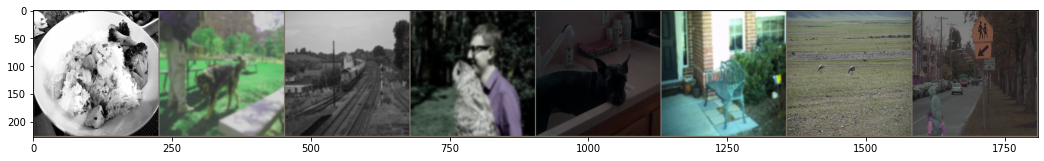

,0,1,2,3,4,5,6,7
bird,0,0,0,1,0,0,1,0
cat,0,0,0,0,0,0,0,0
dog,0,1,0,0,1,0,0,0
person,0,1,0,1,0,0,0,1


(228, 1810, 3)


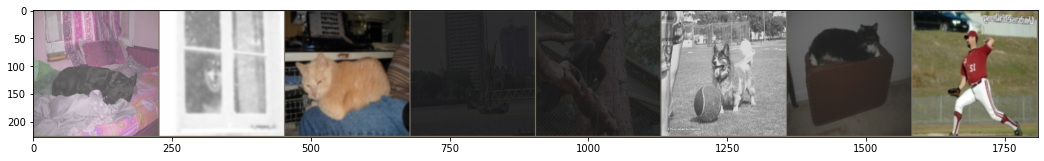

,0,1,2,3,4,5,6,7
bird,0,0,0,1,1,0,0,0
cat,0,0,1,0,0,0,1,0
dog,1,1,0,0,0,1,0,0
person,0,0,1,1,0,1,0,1


(228, 1810, 3)


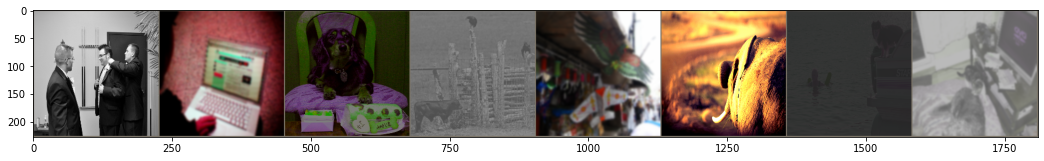

,0,1,2,3,4,5,6,7
bird,0,0,0,1,0,0,0,0
cat,0,0,0,0,0,0,0,1
dog,0,0,1,0,0,0,1,1
person,1,1,0,0,1,0,1,0


(228, 1810, 3)


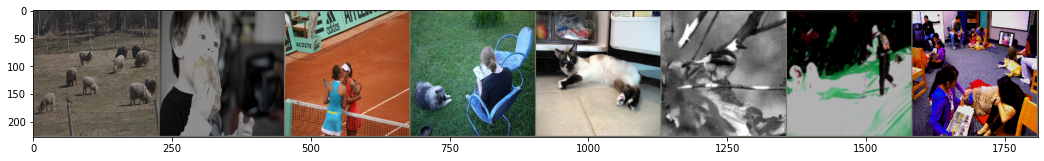

,0,1,2,3,4,5,6,7
bird,1,0,0,0,0,1,0,0
cat,0,0,0,0,1,0,0,0
dog,0,0,0,1,0,0,0,1
person,0,1,1,1,0,0,1,1


(228, 1810, 3)


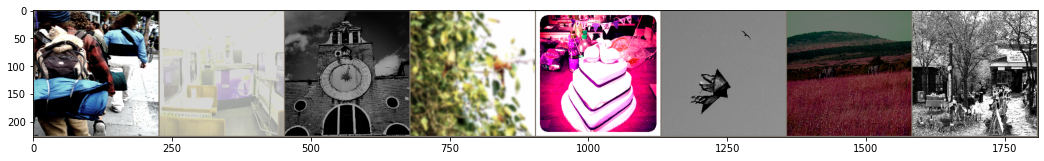

,0,1,2,3,4,5,6,7
bird,0,0,0,1,1,1,0,1
cat,1,0,0,0,0,0,0,0
dog,0,0,0,0,0,0,0,1
person,1,0,0,0,0,0,0,1


(228, 1810, 3)


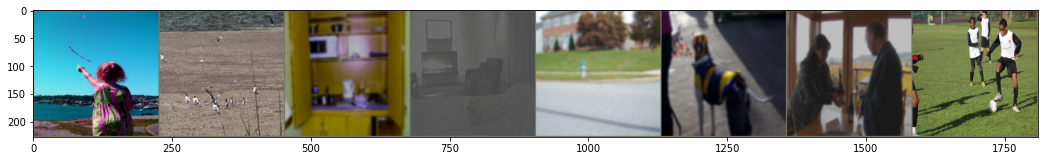

,0,1,2,3,4,5,6,7
bird,0,1,0,0,0,0,0,0
cat,0,0,0,0,0,0,0,0
dog,0,0,0,1,0,1,0,0
person,1,0,0,0,0,1,1,1


In [14]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    print(inp.shape)
    
    # ImageNet constants
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


LIMIT = 5
for i, batch in enumerate(example_dataloader):
    inputs, labels = batch['image'], batch['label']

    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)

    plt.subplots(figsize=(18, 3))
    imshow(out)

    display(pd.DataFrame({CATEGORIES_OF_INTEREST[i]: labels[i].numpy() for i in range(len(labels))}).T)
    
    if i == LIMIT:
        break

## Training and Validation Loops

In [15]:
def train_one_epoch(iterator, model, criterion, optimizer):
    total = 0
    epoch_loss = 0
    per_class_correct = torch.zeros(4)
    
    for batch in tqdm(iterator, desc='train'):
        model.train()

        inputs = batch['image'].to(device) # [batch size, channel, h, w]
        #print(inputs.shape, inputs.dtype)
        # right now, `labels` is a list with num_classes tensors, each tensor with batch_size of labels (integers)
        labels = torch.vstack(batch['label']).T.contiguous().to(torch.float32).to(device)
        #print(labels.shape, labels.dtype, labels.is_contiguous()) # labels
        total += labels.shape[0]
        
        optimizer.zero_grad()

        outputs = model(inputs) #logits
        #print(outputs.shape, outputs.dtype, outputs.is_contiguous())
        #print(outputs)

        loss = criterion(outputs, labels)
        epoch_loss += loss.item() # no need to drag 
        #print(loss.item())

        loss.backward()
        optimizer_ft.step()

        preds = (outputs > 0.5).detach().to(torch.int32) # no need to drag the gradients
        #print(preds)
        per_class_correct += (preds.cpu() == labels.cpu()).sum(0) # 0-th axis for batch_size
        #print(per_class_correct)
    
    avg_epoch_loss = epoch_loss / total
    avg_per_class_acc = per_class_correct / total
    
    return avg_epoch_loss, avg_per_class_acc

In [16]:
def evaluate(iterator, model, criterion):
    total = 0
    epoch_loss = 0
    per_class_correct = torch.zeros(4)
    
    for batch in tqdm(iterator, desc='dev'):
        
        # no need for gradients, batch-norm and dropout in evaluation mode
        model.eval()
        with torch.no_grad():
            
            inputs = batch['image'].to(device) # [batch size, channel, h, w]
            #print(inputs.shape, inputs.dtype)
            # right now, `labels` is a list with num_classes tensors, each tensor with batch_size of labels (integers)
            labels = torch.vstack(batch['label']).T.contiguous().to(torch.float32).to(device)
            #print(labels.shape, labels.dtype, labels.is_contiguous()) # labels
            total += labels.shape[0]

            outputs = model(inputs) #logits
            #print(outputs.shape, outputs.dtype, outputs.is_contiguous())
            #print(outputs)

            loss = criterion(outputs, labels)
            epoch_loss += loss.item() # no need to drag 
            #print(loss.item())

            preds = (outputs > 0.5).detach().to(torch.int32) # no need to drag the gradients
            #print(preds)
            per_class_correct += (preds.cpu() == labels.cpu()).sum(0) # 0-th axis for batch_size
            #print(per_class_correct)
    
    avg_epoch_loss = epoch_loss / total
    avg_per_class_acc = per_class_correct / total
    
    return avg_epoch_loss, avg_per_class_acc

# Training

## Fine-tune only the Attention Head and save

In [17]:
device

'cuda:0'

In [18]:
# pre-trained resnet model without the head
headless_resnet18 = get_resnet(arch=BACKBONE, pretrained=True, include_top=False)
# randomely initialized attention module
gated_attention_model = GatedAttentionModule(num_classes=len(CATEGORIES_OF_INTEREST),
                                             use_dilated_block=USE_DILATED_BLOCK)

model_ft = nn.Sequential() # .add_module() allows to name the parameters
model_ft.add_module('resnet', headless_resnet18)
#print(summary(model_ft.to(device), (3, 224, 224)))
model_ft.add_module('attention_head', gated_attention_model)
#print(summary(model_ft.to(device), (3, 224, 224)))

# freese all parameters
for param in model_ft.resnet.parameters():
    param.requires_grad = False

# unfreeeze model parameters of model head
for param in model_ft.attention_head.parameters():
    param.requires_grad = True

# place it on the device
model_ft = model_ft.to(device)

criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.Adam(model_ft.parameters(), lr=0.01) # weight_decay=WEIGHT_DECAY

# Decay LR by a factor of `gamma` every `step_size` epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=6, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [19]:
#model_ft

Epoch: 0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)



Train Avg Acc: 0.7671874761581421
Train Loss: 2.1692309021949767
Train Accs per class: tensor([0.7984, 0.7984, 0.7766, 0.6953])




Dev Avg Acc: 0.8097655773162842
Dev Loss: 1.8081195294857024
Dev Accs per class: tensor([0.8156, 0.7922, 0.8094, 0.8219])


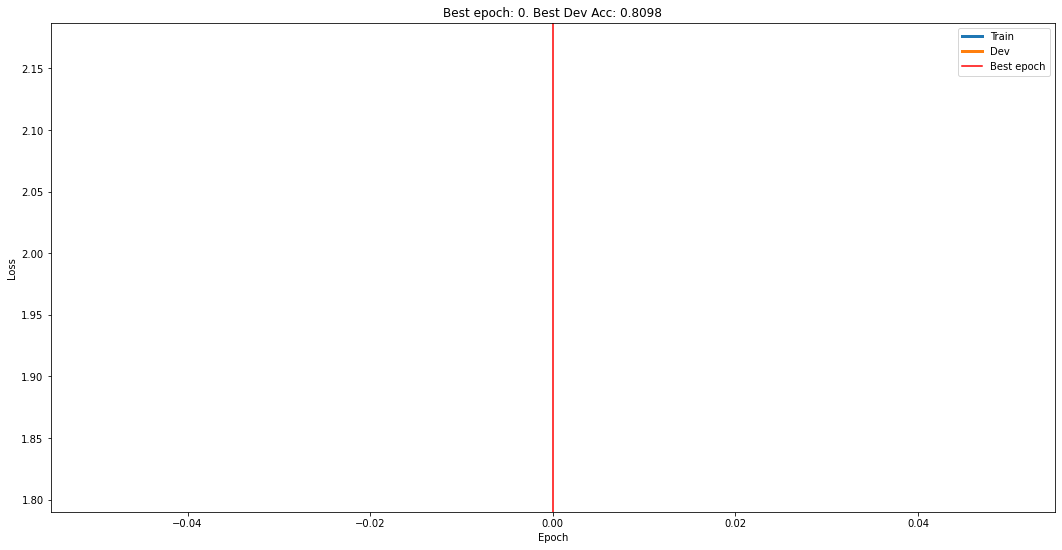


--------------------------------------------------------------------------------

Epoch: 1



Train Avg Acc: 0.8109375238418579
Train Loss: 1.7113093793392182
Train Accs per class: tensor([0.8188, 0.8391, 0.8031, 0.7828])




Dev Avg Acc: 0.832812488079071
Dev Loss: 1.6126953125
Dev Accs per class: tensor([0.8578, 0.8828, 0.8219, 0.7688])


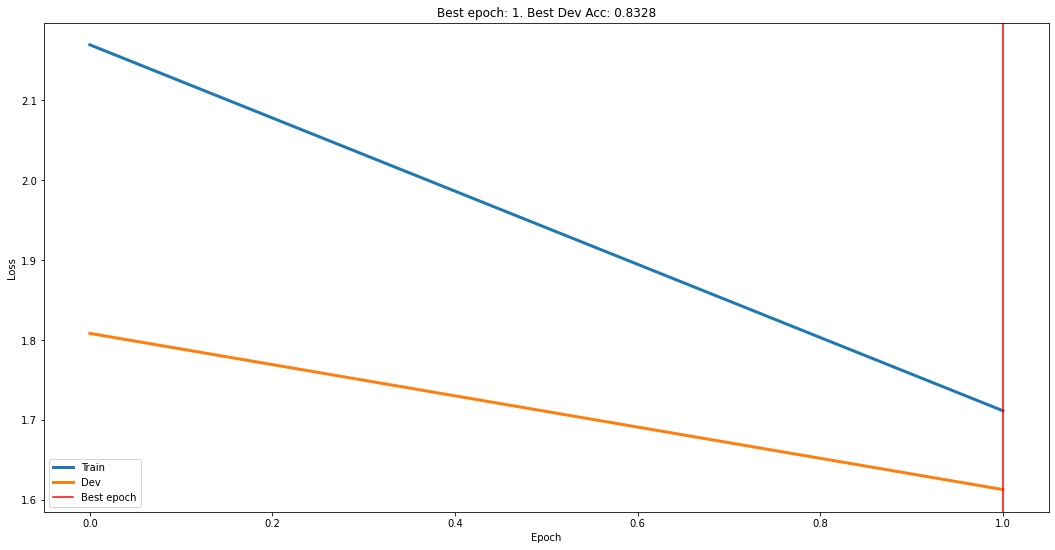


--------------------------------------------------------------------------------

Epoch: 2



Train Avg Acc: 0.8203125
Train Loss: 1.625117337703705
Train Accs per class: tensor([0.8359, 0.8734, 0.8094, 0.7625])




Dev Avg Acc: 0.849609375
Dev Loss: 1.4894968390464782
Dev Accs per class: tensor([0.8562, 0.8969, 0.8234, 0.8219])


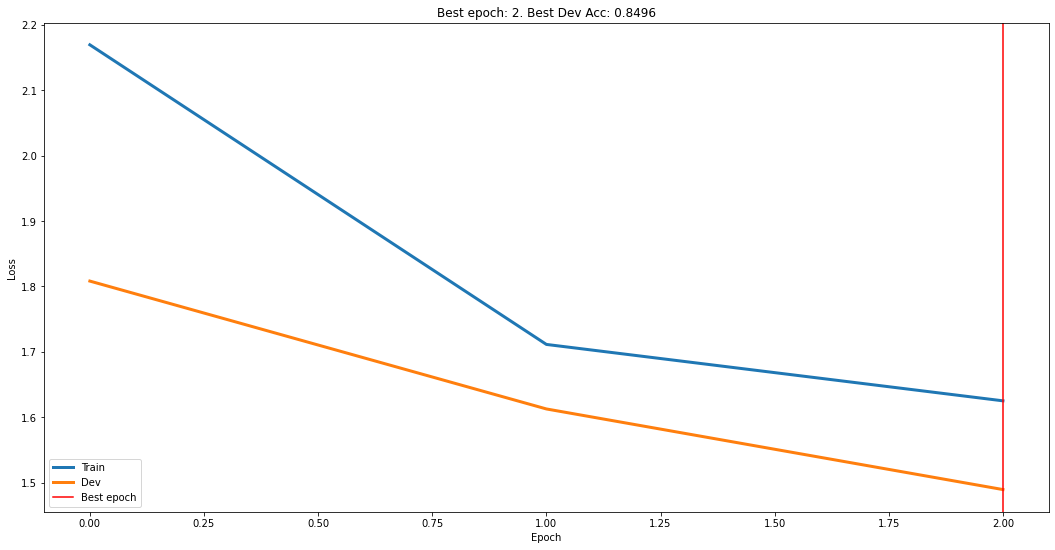


--------------------------------------------------------------------------------

Epoch: 3



Train Avg Acc: 0.8374999761581421
Train Loss: 1.5146309196949006
Train Accs per class: tensor([0.8484, 0.8797, 0.8172, 0.8047])




Dev Avg Acc: 0.8515625
Dev Loss: 1.4592644155025483
Dev Accs per class: tensor([0.8391, 0.9031, 0.8359, 0.8281])


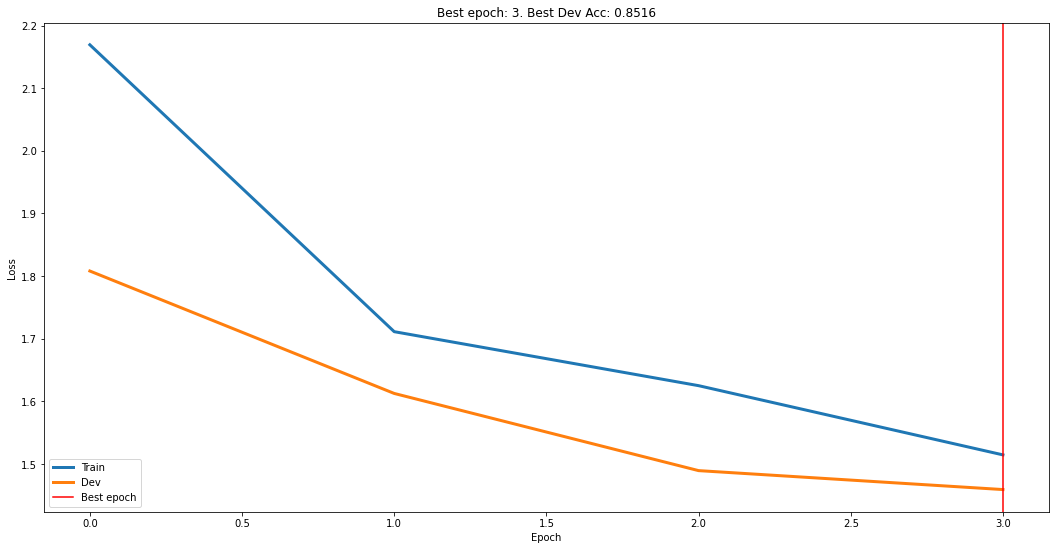


--------------------------------------------------------------------------------

Epoch: 4



Train Avg Acc: 0.842968761920929
Train Loss: 1.4467806339263916
Train Accs per class: tensor([0.8469, 0.8719, 0.8297, 0.8234])




Dev Avg Acc: 0.8519530892372131
Dev Loss: 1.4541845113039016
Dev Accs per class: tensor([0.8453, 0.9062, 0.8328, 0.8234])


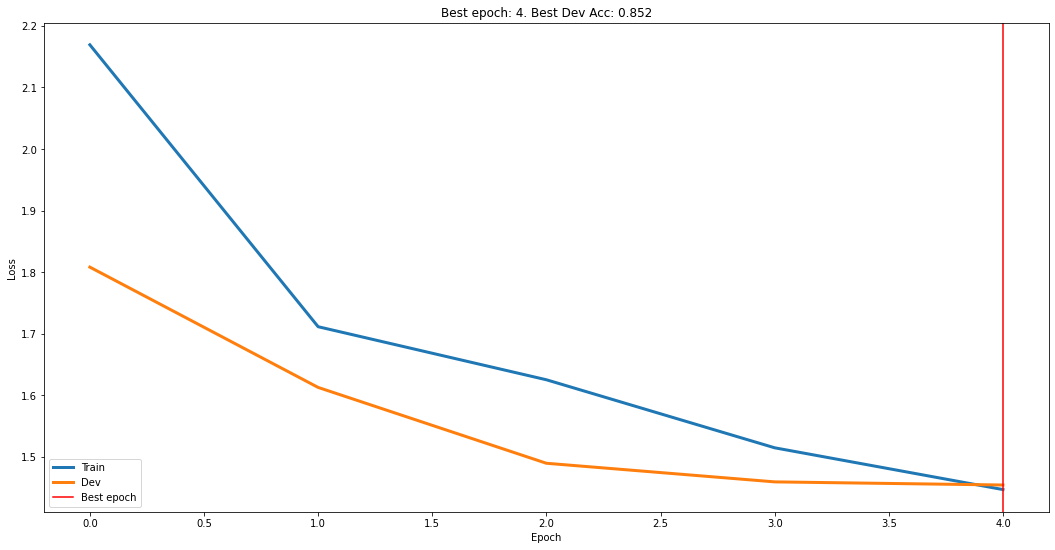


--------------------------------------------------------------------------------

Epoch: 5



Train Avg Acc: 0.840624988079071
Train Loss: 1.4526441633701324
Train Accs per class: tensor([0.8484, 0.8766, 0.8406, 0.7969])




Dev Avg Acc: 0.845703125
Dev Loss: 1.5208004653453826
Dev Accs per class: tensor([0.8203, 0.8859, 0.8281, 0.8484])


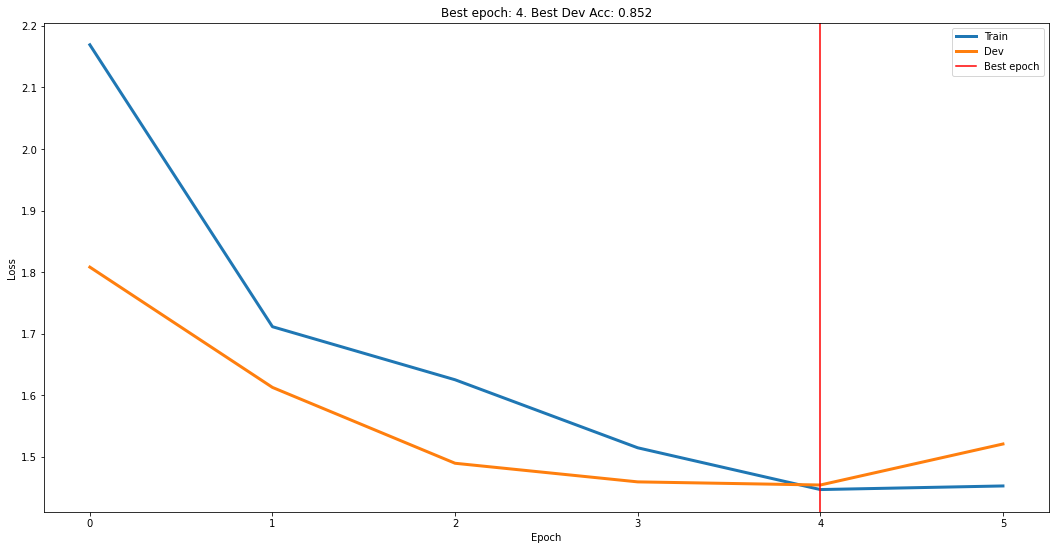


--------------------------------------------------------------------------------

Epoch: 6



Train Avg Acc: 0.8500000238418579
Train Loss: 1.3009680569171906
Train Accs per class: tensor([0.8484, 0.9016, 0.8391, 0.8109])




Dev Avg Acc: 0.8558593988418579
Dev Loss: 1.4048961222171783
Dev Accs per class: tensor([0.8359, 0.9031, 0.8344, 0.8500])


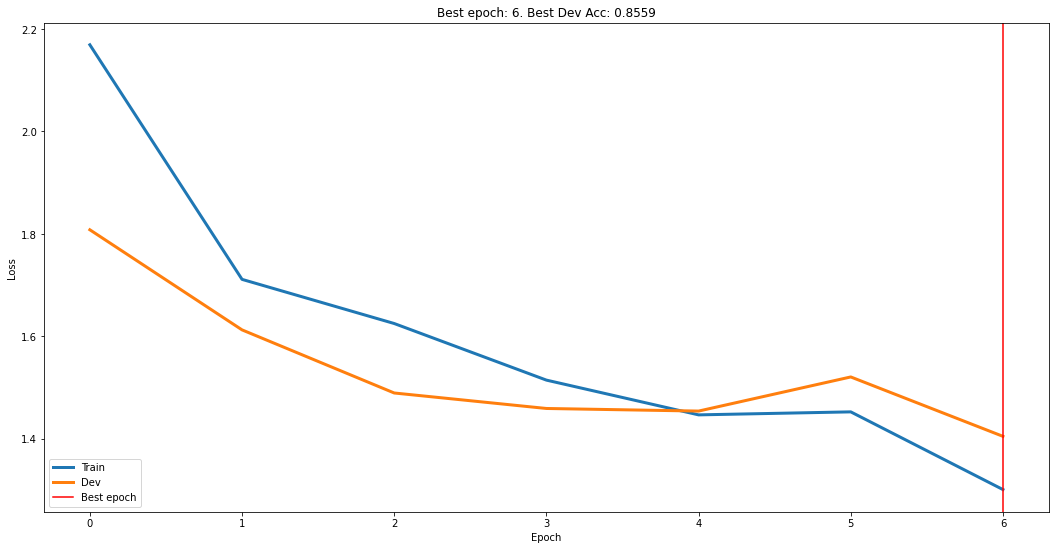


--------------------------------------------------------------------------------

Epoch: 7



Train Avg Acc: 0.852343738079071
Train Loss: 1.3179449617862702
Train Accs per class: tensor([0.8719, 0.8750, 0.8391, 0.8234])




Dev Avg Acc: 0.8582030534744263
Dev Loss: 1.4008016109466552
Dev Accs per class: tensor([0.8406, 0.9047, 0.8297, 0.8578])


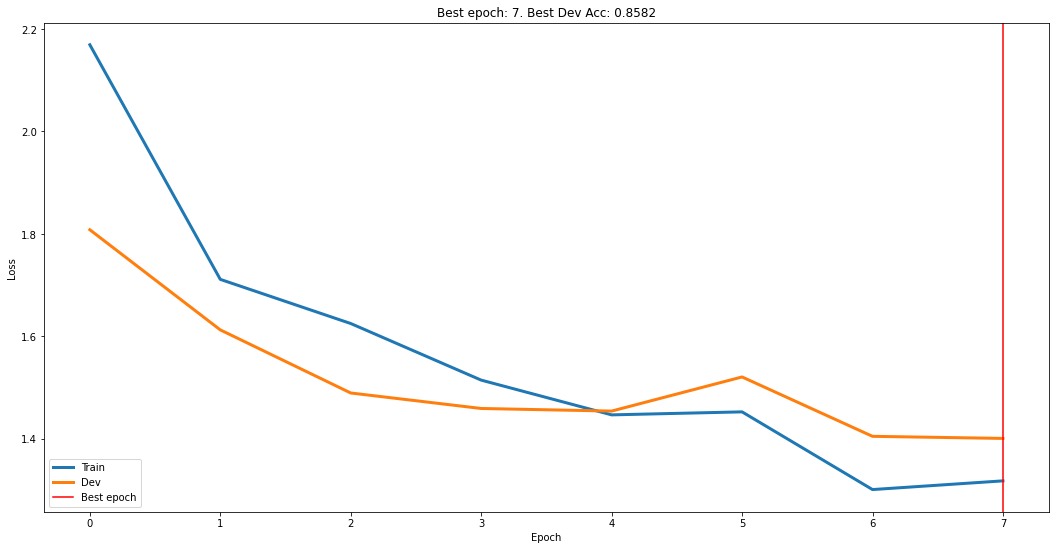


--------------------------------------------------------------------------------


CPU times: user 4min 57s, sys: 6.97 s, total: 5min 4s
Wall time: 12min 6s


In [20]:
%%time
last_layer_num_epochs = 8

train_epoch_loss_history = []
train_per_class_acc_history = []

dev_epoch_loss_history = []
dev_per_class_acc_history = []

dev_epoch_acc_history = []
train_epoch_acc_history = []

best_acc = None
best_epoch = None

best_model_wts = copy.deepcopy(model_ft.state_dict())

for epoch in trange(last_layer_num_epochs, desc='epoch'):
    print('Epoch:', epoch)
    # train
    avg_epoch_loss, avg_per_class_acc = train_one_epoch(iterator=train1_dataloader,
                                                        model=model_ft, criterion=criterion,
                                                        optimizer=optimizer_ft)
    avg_acc = avg_per_class_acc.mean().item()
    train_epoch_acc_history.append(avg_acc)
    print('Train Avg Acc:', avg_acc)
    train_epoch_loss_history.append(avg_epoch_loss)
    train_per_class_acc_history.append(avg_per_class_acc)
    print('Train Loss:', avg_epoch_loss)
    print('Train Accs per class:', avg_per_class_acc)
    print()
    
    # evaluate on the dev set
    avg_epoch_loss, avg_per_class_acc = evaluate(iterator=dev1_dataloader,
                                                 model=model_ft, criterion=criterion)
    avg_acc = avg_per_class_acc.mean().item()
    dev_epoch_acc_history.append(avg_acc)
    print('Dev Avg Acc:', avg_acc)
    dev_epoch_loss_history.append(avg_epoch_loss)
    dev_per_class_acc_history.append(avg_per_class_acc)
    print('Dev Loss:', avg_epoch_loss)
    print('Dev Accs per class:', avg_per_class_acc)
    
    
        
    if (not best_acc) or avg_acc > best_acc:
        best_epoch = epoch
        best_acc = avg_acc
        
        best_model_wts = copy.deepcopy(model_ft.state_dict())

    # lr scheduler step
    exp_lr_scheduler.step()

    # plot
    plt.figure(figsize=(18, 9))
    plt.plot(np.arange(len(train_epoch_loss_history)), train_epoch_loss_history, label=f'Train', linewidth=3)
    plt.plot(np.arange(len(dev_epoch_loss_history)), dev_epoch_loss_history, label=f'Dev', linewidth=3)
    plt.axvline(x=best_epoch, label='Best epoch', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Best epoch: {best_epoch}. Best Dev Acc: {best_acc:.4}')
    plt.legend(loc='best')
    plt.show()


    print()
    print('-'*80)
    print()

### Save the model with the last layer fine-tuned - this does not change.

In [21]:
LL_FINE_TUNED_MODEL_NAME = f'{BACKBONE}_gated-attention-finetuned_dilated-block={USE_DILATED_BLOCK}'
print(LL_FINE_TUNED_MODEL_NAME)
LL_FINE_TUNED_MODEL_PATH = f'../weights/{LL_FINE_TUNED_MODEL_NAME}.pth'
torch.save(model_ft.state_dict(), LL_FINE_TUNED_MODEL_PATH)

history = {
    'train_losses': [float(el) for el in train_epoch_loss_history],
    'dev_losses': [float(el) for el in dev_epoch_loss_history],

    'train_per_class_accuracies': [list(el.numpy().astype(float)) for el in train_per_class_acc_history],
    'dev_per_class_accuracies': [list(el.numpy().astype(float)) for el in dev_per_class_acc_history],

    'train_average_accuracies': [float(el) for el in train_epoch_acc_history],
    'dev_average_accuracies': [float(el) for el in dev_epoch_acc_history],
    
    'best_epoch': best_epoch,
    'best_acc': best_acc
}

with open(f'../history/{LL_FINE_TUNED_MODEL_NAME}.json', 'w') as f:
    json.dump(history, f)

# # load history
# with open(f'../history/{LL_FINE_TUNED_MODEL_NAME}.json') as f:
#     history = json.load(f)

# history

resnet18_gated-attention-finetuned_dilated-block=True


In [22]:
# load the fine-tuned model parameters
model_ft.load_state_dict(torch.load(LL_FINE_TUNED_MODEL_PATH))
print(evaluate(iterator=dev1_dataloader, model=model_ft, criterion=criterion))


(1.4008016109466552, tensor([0.8406, 0.9047, 0.8297, 0.8578]))


## Fine-tune all layers with lower learning rate

In [38]:
device

'cuda:0'

In [66]:
model_ft.load_state_dict(torch.load(LL_FINE_TUNED_MODEL_PATH))

# unfreese all parameters
for param in model_ft.parameters():
    param.requires_grad = True

# place it on the device
model_ft = model_ft.to(device)

# criterion and optimizer
criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer_ft = torch.optim.Adam(model_ft.parameters(), lr=0.0001, weight_decay=WEIGHT_DECAY)

# Decay LR by a factor of `gamma` every `step_size` epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)

In [67]:
print(MODEL_NAME)
print(evaluate(iterator=dev1_dataloader, model=model_ft, criterion=criterion))

gated-attention_dilated-block=True_resnet18_wd=80_2021-06-30



(1.4008016109466552, tensor([0.8406, 0.9047, 0.8297, 0.8578]))


In [68]:
# load history from the last-layer fine-tuned model
with open(f'../history/{LL_FINE_TUNED_MODEL_NAME}.json') as f:
    history = json.load(f)
#history

Epoch: 8



Train Avg Acc: 0.849609375
Train Loss: 1.325034075975418
Train Accs per class: tensor([0.8547, 0.8813, 0.8562, 0.8062])




Dev Avg Acc: 0.860156238079071
Dev Loss: 1.3741135001182556
Dev Accs per class: tensor([0.8469, 0.9062, 0.8359, 0.8516])


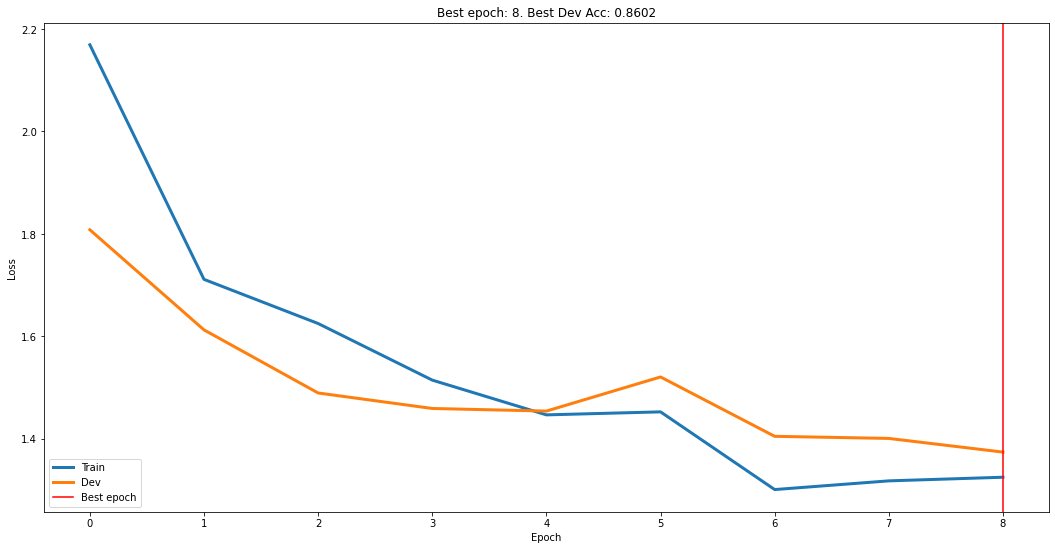


--------------------------------------------------------------------------------

Epoch: 9



Train Avg Acc: 0.8539062738418579
Train Loss: 1.3183105289936066
Train Accs per class: tensor([0.8625, 0.8797, 0.8609, 0.8125])




Dev Avg Acc: 0.859375
Dev Loss: 1.3840315818786622
Dev Accs per class: tensor([0.8484, 0.9062, 0.8391, 0.8438])


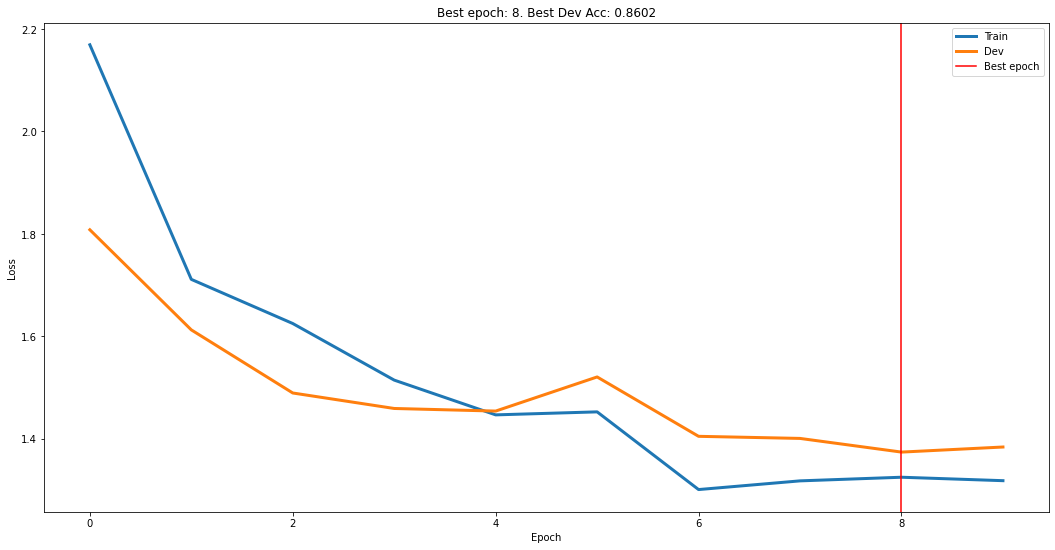


--------------------------------------------------------------------------------

Epoch: 10



Train Avg Acc: 0.856640636920929
Train Loss: 1.326570588350296
Train Accs per class: tensor([0.8594, 0.8969, 0.8453, 0.8250])




Dev Avg Acc: 0.8617187738418579
Dev Loss: 1.391630733013153
Dev Accs per class: tensor([0.8484, 0.9062, 0.8313, 0.8609])


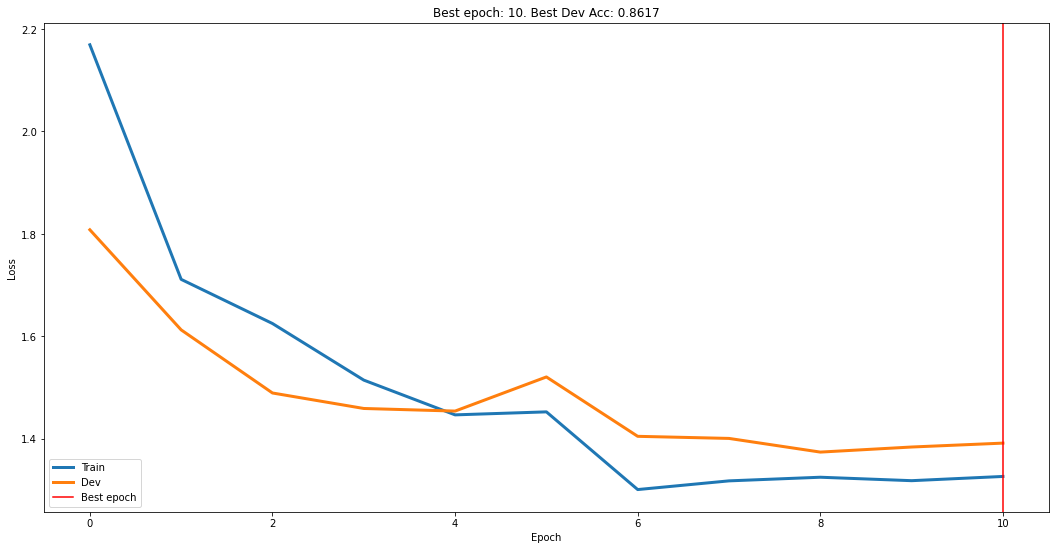


--------------------------------------------------------------------------------

Epoch: 11



Train Avg Acc: 0.8523437976837158
Train Loss: 1.354487770795822
Train Accs per class: tensor([0.8609, 0.9000, 0.8344, 0.8141])




Dev Avg Acc: 0.8570312857627869
Dev Loss: 1.420520469546318
Dev Accs per class: tensor([0.8422, 0.8953, 0.8266, 0.8641])


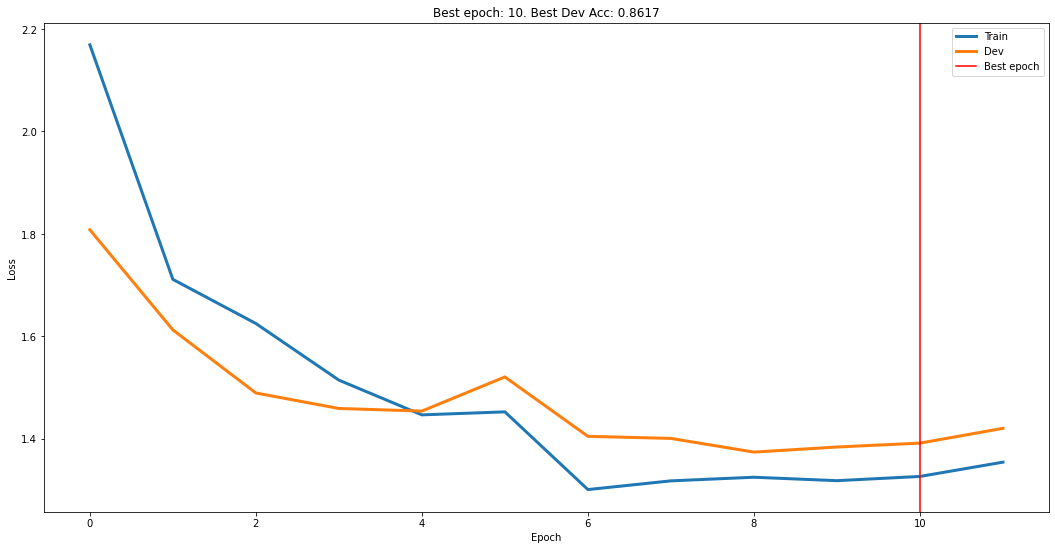


--------------------------------------------------------------------------------

Epoch: 12



Train Avg Acc: 0.849609375
Train Loss: 1.3503856539726258
Train Accs per class: tensor([0.8516, 0.8734, 0.8422, 0.8313])




Dev Avg Acc: 0.8523437976837158
Dev Loss: 1.4675251215696334
Dev Accs per class: tensor([0.8422, 0.8938, 0.8250, 0.8484])


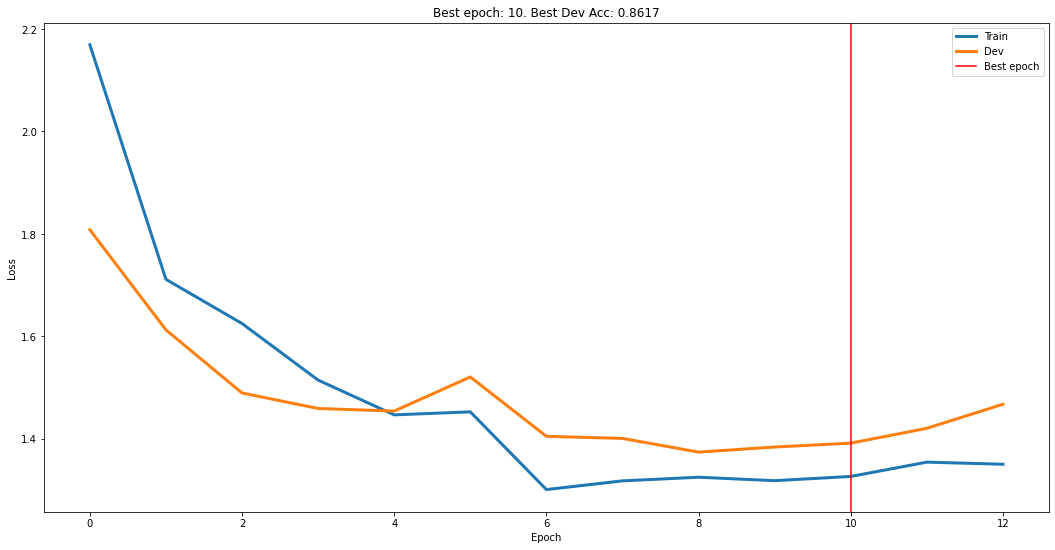


--------------------------------------------------------------------------------

Epoch: 13



Train Avg Acc: 0.857421875
Train Loss: 1.2765897870063783
Train Accs per class: tensor([0.8594, 0.8922, 0.8453, 0.8328])




Dev Avg Acc: 0.8523436784744263
Dev Loss: 1.4475114405155183
Dev Accs per class: tensor([0.8406, 0.8969, 0.8219, 0.8500])


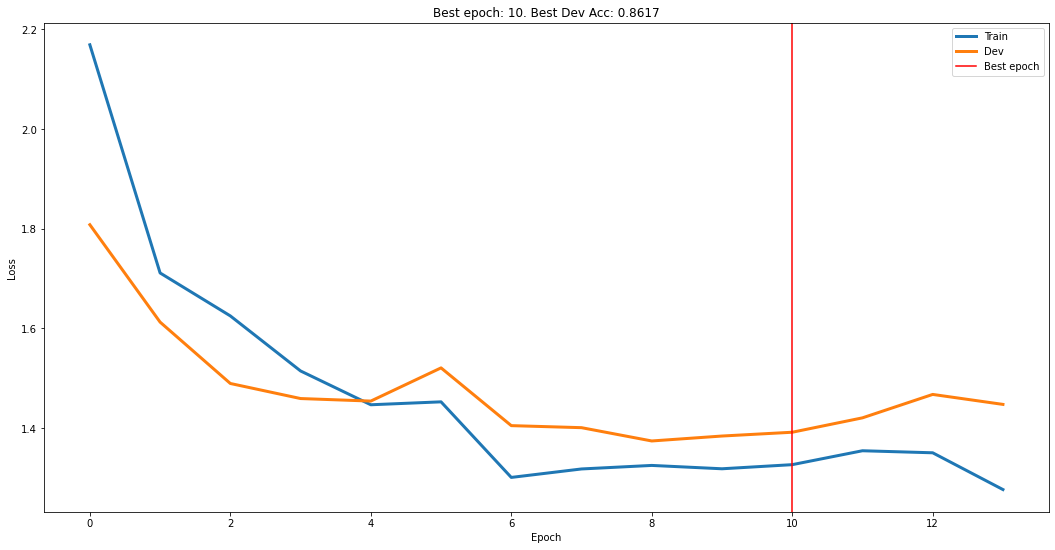


--------------------------------------------------------------------------------

Epoch: 14



Train Avg Acc: 0.854296863079071
Train Loss: 1.2861600935459137
Train Accs per class: tensor([0.8625, 0.8859, 0.8359, 0.8328])




Dev Avg Acc: 0.852734386920929
Dev Loss: 1.4502495288848878
Dev Accs per class: tensor([0.8375, 0.9016, 0.8234, 0.8484])


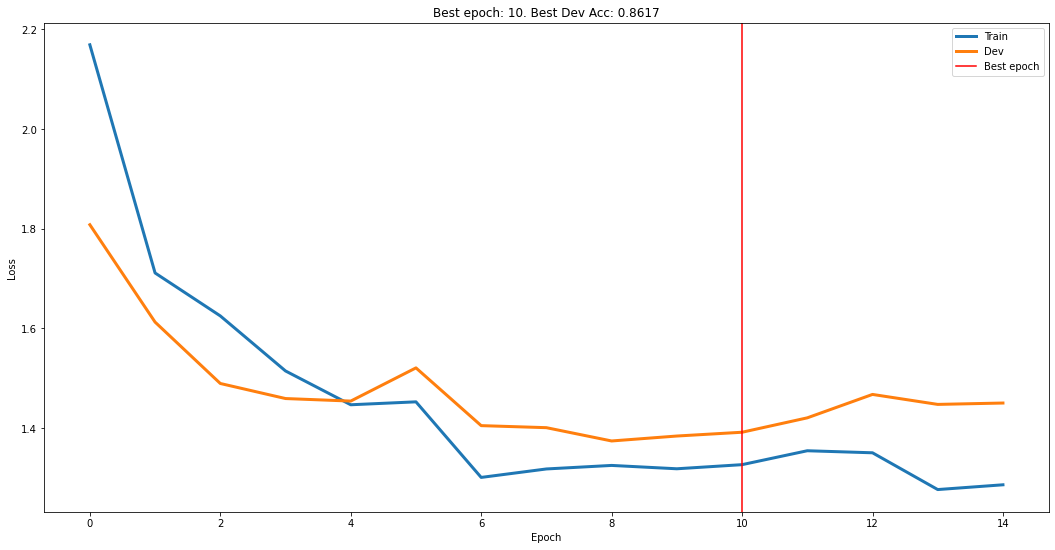


--------------------------------------------------------------------------------

Epoch: 15



Train Avg Acc: 0.854687511920929
Train Loss: 1.2837526381015778
Train Accs per class: tensor([0.8734, 0.8797, 0.8484, 0.8172])




Dev Avg Acc: 0.8500000238418579
Dev Loss: 1.549861377477646
Dev Accs per class: tensor([0.8391, 0.8969, 0.8219, 0.8422])


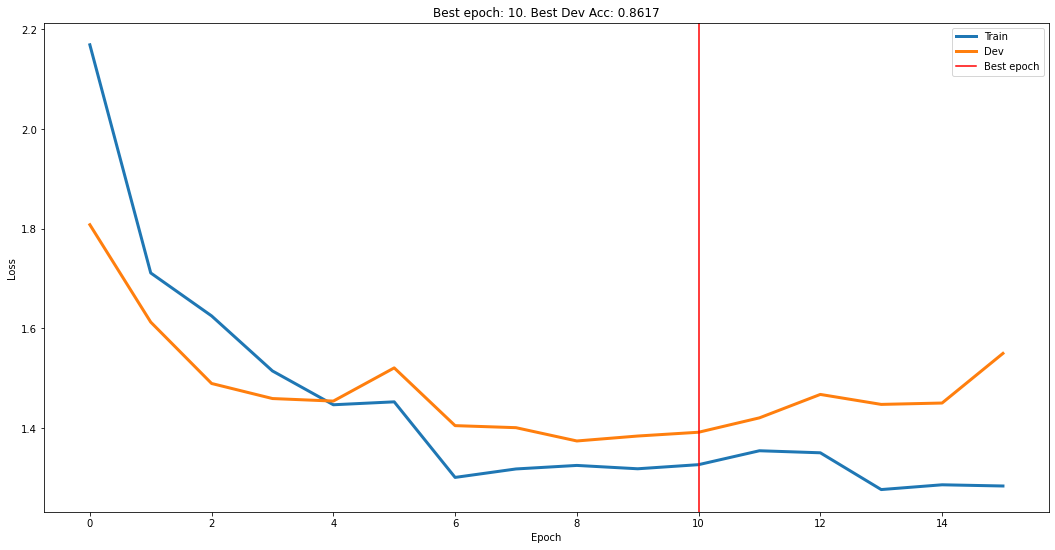


--------------------------------------------------------------------------------

Epoch: 16



Train Avg Acc: 0.856249988079071
Train Loss: 1.2787666618824005
Train Accs per class: tensor([0.8672, 0.8859, 0.8484, 0.8234])




Dev Avg Acc: 0.8539062738418579
Dev Loss: 1.4743064135313033
Dev Accs per class: tensor([0.8406, 0.8922, 0.8250, 0.8578])


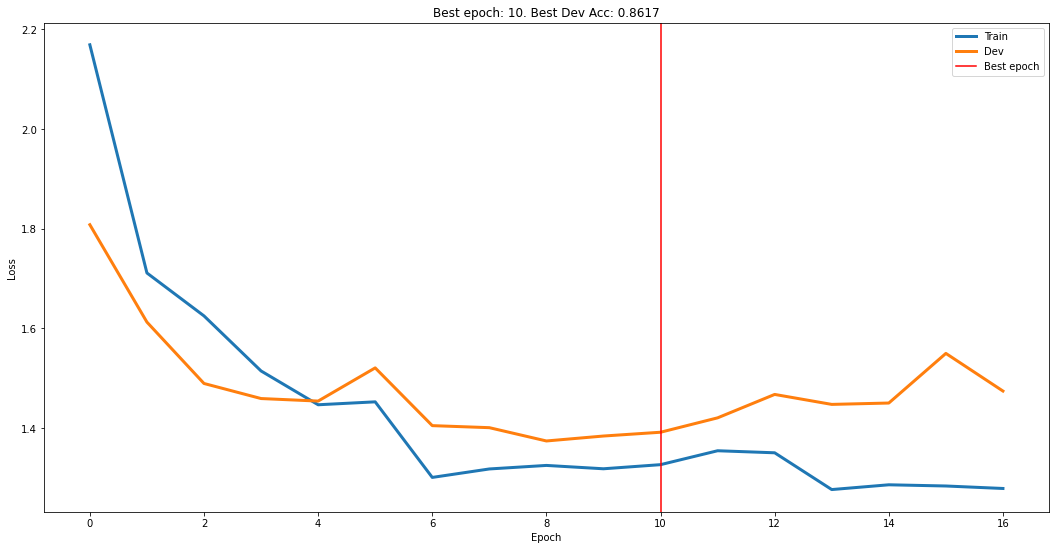


--------------------------------------------------------------------------------

Epoch: 17



Train Avg Acc: 0.8667968511581421
Train Loss: 1.2636447727680207
Train Accs per class: tensor([0.8703, 0.9031, 0.8578, 0.8359])




Dev Avg Acc: 0.846484363079071
Dev Loss: 1.5190912753343582
Dev Accs per class: tensor([0.8422, 0.9000, 0.8000, 0.8438])


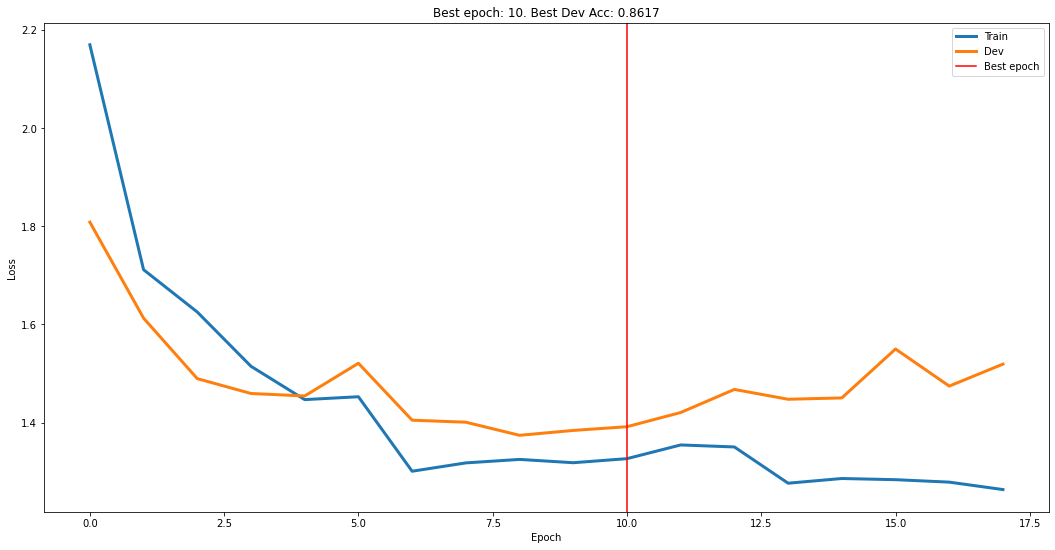


--------------------------------------------------------------------------------

Epoch: 18



Train Avg Acc: 0.869140625
Train Loss: 1.193633845448494
Train Accs per class: tensor([0.8828, 0.8953, 0.8531, 0.8453])




Dev Avg Acc: 0.848437488079071
Dev Loss: 1.476719903945923
Dev Accs per class: tensor([0.8375, 0.8953, 0.8172, 0.8438])


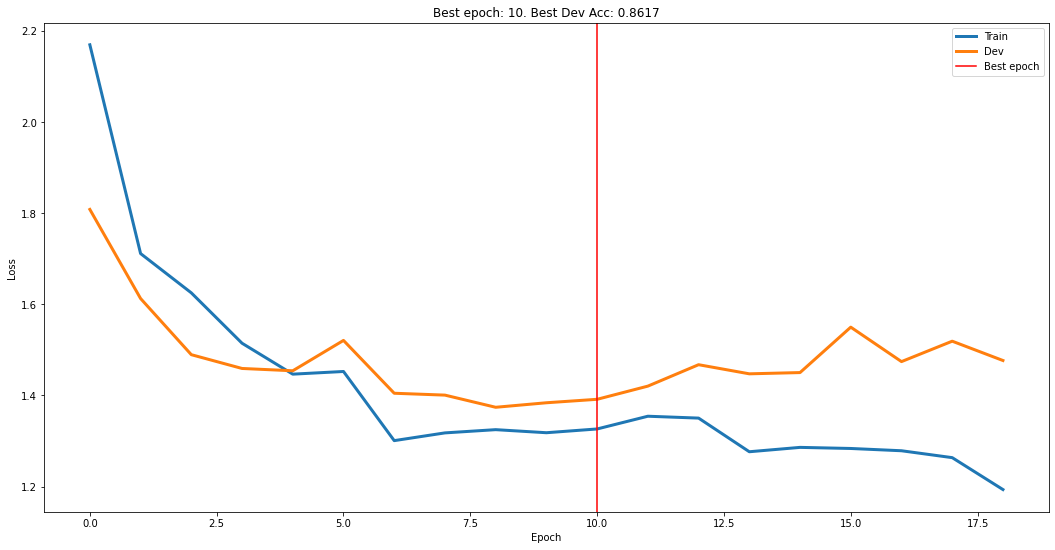


--------------------------------------------------------------------------------

Epoch: 19



Train Avg Acc: 0.869140625
Train Loss: 1.163651967048645
Train Accs per class: tensor([0.8734, 0.9000, 0.8547, 0.8484])




Dev Avg Acc: 0.850781261920929
Dev Loss: 1.4803021430969239
Dev Accs per class: tensor([0.8422, 0.8938, 0.8234, 0.8438])


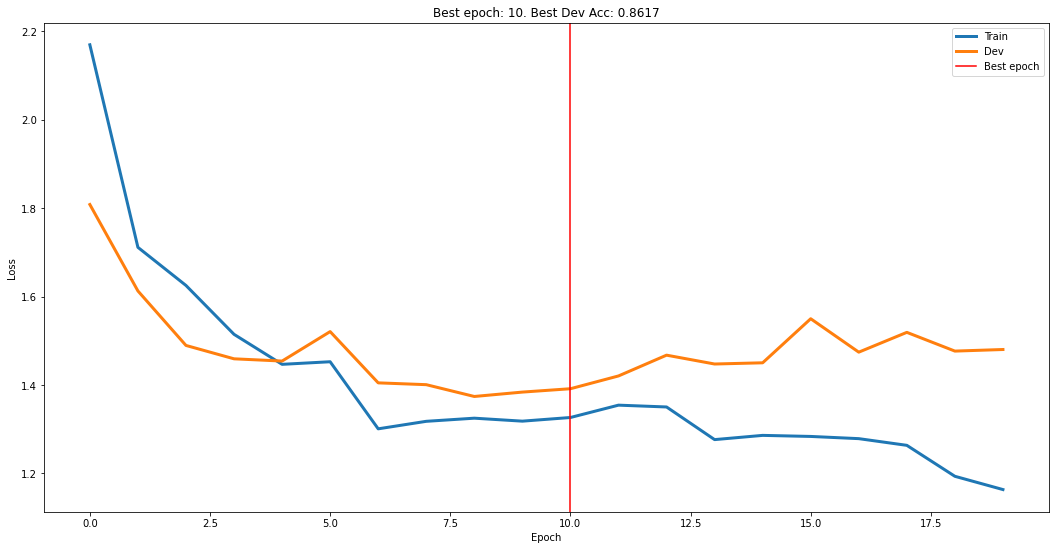


--------------------------------------------------------------------------------

Epoch: 20



Train Avg Acc: 0.867968738079071
Train Loss: 1.179394206404686
Train Accs per class: tensor([0.8781, 0.8953, 0.8656, 0.8328])




Dev Avg Acc: 0.8539062738418579
Dev Loss: 1.4783193230628968
Dev Accs per class: tensor([0.8500, 0.8984, 0.8188, 0.8484])


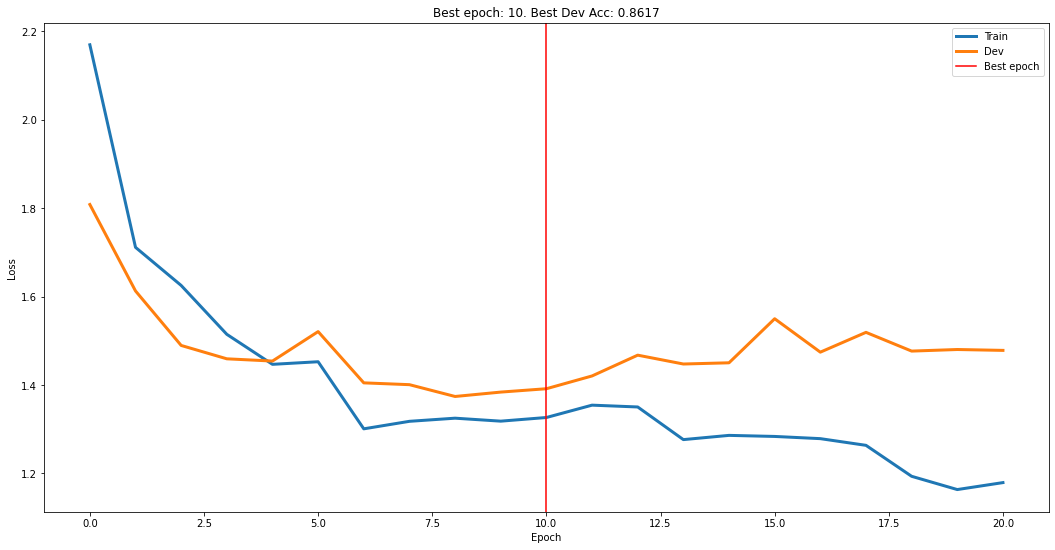


--------------------------------------------------------------------------------

Epoch: 21



Train Avg Acc: 0.8667968511581421
Train Loss: 1.158485436439514
Train Accs per class: tensor([0.8766, 0.8922, 0.8531, 0.8453])




Dev Avg Acc: 0.8492187261581421
Dev Loss: 1.486344850063324
Dev Accs per class: tensor([0.8375, 0.8891, 0.8203, 0.8500])


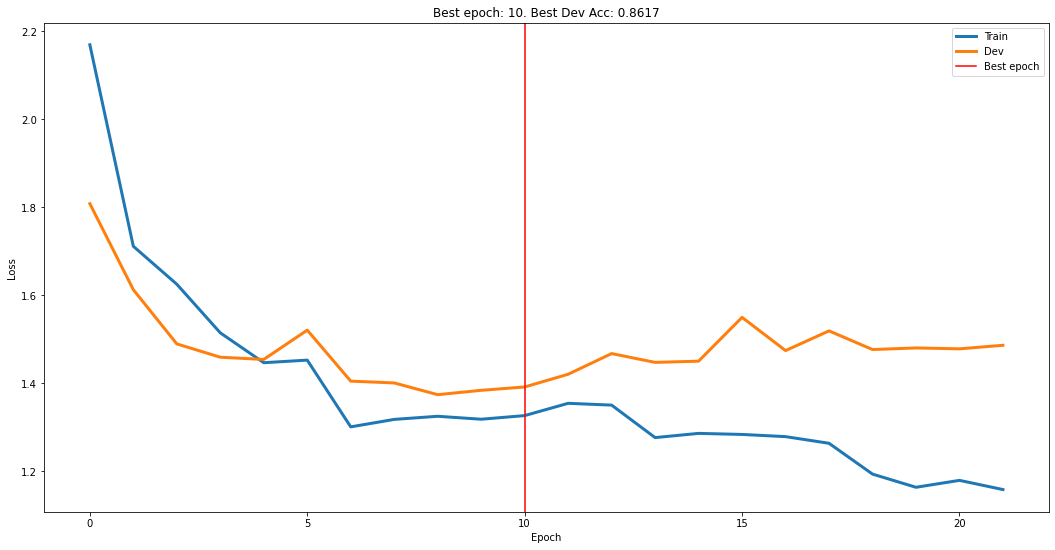


--------------------------------------------------------------------------------




In [69]:
all_layers_num_epochs = 14

train_epoch_loss_history = history['train_losses']
dev_epoch_loss_history = history['dev_losses']

train_per_class_acc_history = history['train_per_class_accuracies']
dev_per_class_acc_history = history['dev_per_class_accuracies']

dev_epoch_acc_history = history['train_average_accuracies']
train_epoch_acc_history = history['dev_average_accuracies']

best_acc = history['best_acc']
best_epoch =  history['best_epoch']

for epoch in trange(last_layer_num_epochs, last_layer_num_epochs+all_layers_num_epochs, desc='epoch'):
    print('Epoch:', epoch)
    # train
    avg_epoch_loss, avg_per_class_acc = train_one_epoch(iterator=train1_dataloader,
                                                        model=model_ft, criterion=criterion,
                                                        optimizer=optimizer_ft)
    avg_acc = avg_per_class_acc.mean().item()
    train_epoch_acc_history.append(avg_acc)
    print('Train Avg Acc:', avg_acc)
    train_epoch_loss_history.append(avg_epoch_loss)
    train_per_class_acc_history.append(avg_per_class_acc)
    print('Train Loss:', avg_epoch_loss)
    print('Train Accs per class:', avg_per_class_acc)
    print()
    
    # evaluate on the dev set
    avg_epoch_loss, avg_per_class_acc = evaluate(iterator=dev1_dataloader,
                                                 model=model_ft, criterion=criterion)
    avg_acc = avg_per_class_acc.mean().item()
    dev_epoch_acc_history.append(avg_acc)
    print('Dev Avg Acc:', avg_acc)
    dev_epoch_loss_history.append(avg_epoch_loss)
    dev_per_class_acc_history.append(avg_per_class_acc)
    print('Dev Loss:', avg_epoch_loss)
    print('Dev Accs per class:', avg_per_class_acc)
    
    if (not best_acc) or avg_acc > best_acc:
        best_epoch = epoch
        best_acc = avg_acc
        
        best_model_wts = copy.deepcopy(model_ft.state_dict())

    # lr scheduler step
    exp_lr_scheduler.step()

    # plot
    plt.figure(figsize=(18, 9))
    plt.plot(np.arange(len(train_epoch_loss_history)), train_epoch_loss_history, label=f'Train', linewidth=3)
    plt.plot(np.arange(len(dev_epoch_loss_history)), dev_epoch_loss_history, label=f'Dev', linewidth=3)
    plt.axvline(x=best_epoch, label='Best epoch', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Best epoch: {best_epoch}. Best Dev Acc: {best_acc:.4}')
    plt.legend(loc='best')
    plt.show()


    print()
    print('-'*80)
    print()

### Save weights

In [70]:
%mkdir ../weights

mkdir: cannot create directory ‘../weights’: File exists


In [71]:
torch.save(model_ft.state_dict(), f'../weights/{MODEL_NAME}.pth')

In [72]:
%ls ../weights

 2-layer-head-baseline-2021-06-16.pth
'2-layer-head_dropout=0.5_2021-06-16.pth'
'2-layer-head_dropout=0.5_wd=0.2_2021-06-16.pth'
'2-layer-head_dropout=0.5_wd=1_2021-06-16.pth'
'2-layer-head_dropout=0.8_2021-06-16.pth'
'2-layer-head_dropout=0.8_wd=0.1_2021-06-16.pth'
'2-layer-head_dropout=0.8_wd=1_2021-06-16.pth'
'Adam_wd=0.0001_2021-06-11.pth'
'Adam_wd=0.01_2021-06-11.pth'
'Adam_wd=100_2021-06-11.pth'
'Adam_wd=10_2021-06-11.pth'
'Adam_wd=1_2021-06-11.pth'
'Adam_wd=1e-08_2021-06-11.pth'
 baseline-2021-06-08.pth
 baseline-2021-06-09.pth
 baseline-Adam-2021-06-11.pth
 efficientnet-b2_1-layer-head-finetuned.pth
 efficientnet-b2_baseline_2021-06-17.pth
 efficientnet-b3_1-layer-head-finetuned.pth
 efficientnet-b3_2-layer-head-finetuned.pth
'efficientnet-b3_2-layer-head_p=0.8_2021-06-17.pth'
 efficientnet-b3_baseline_2021-06-17.pth
'gated-attention_dilated-block=False_resnet18_2021-06-30.pth'
'gated-attention_dilated-block=False_resnet18_wd=10_2021-06-30.pth'
'gated-attention_dilated-block=Fa

## Save history

In [73]:
%mkdir ../history

mkdir: cannot create directory ‘../history’: File exists


In [74]:
train_per_class_acc_history

[[0.7984374761581421, 0.7984374761581421, 0.776562511920929, 0.6953125],
 [0.8187500238418579,
  0.839062511920929,
  0.8031250238418579,
  0.7828124761581421],
 [0.8359375, 0.8734375238418579, 0.809374988079071, 0.762499988079071],
 [0.848437488079071, 0.879687488079071, 0.817187488079071, 0.8046875],
 [0.846875011920929, 0.871874988079071, 0.8296874761581421, 0.823437511920929],
 [0.848437488079071, 0.8765624761581421, 0.840624988079071, 0.796875],
 [0.848437488079071, 0.901562511920929, 0.839062511920929, 0.8109375238418579],
 [0.871874988079071, 0.875, 0.839062511920929, 0.823437511920929],
 tensor([0.8547, 0.8813, 0.8562, 0.8062]),
 tensor([0.8625, 0.8797, 0.8609, 0.8125]),
 tensor([0.8594, 0.8969, 0.8453, 0.8250]),
 tensor([0.8609, 0.9000, 0.8344, 0.8141]),
 tensor([0.8516, 0.8734, 0.8422, 0.8313]),
 tensor([0.8594, 0.8922, 0.8453, 0.8328]),
 tensor([0.8625, 0.8859, 0.8359, 0.8328]),
 tensor([0.8734, 0.8797, 0.8484, 0.8172]),
 tensor([0.8672, 0.8859, 0.8484, 0.8234]),
 tensor([0.

In [75]:
history = {
    'train_losses': [float(el) for el in train_epoch_loss_history],
    'dev_losses': [float(el) for el in dev_epoch_loss_history],

    'train_per_class_accuracies': [list(torch.tensor(el).numpy().astype(float)) for el in train_per_class_acc_history],
    'dev_per_class_accuracies': [list(torch.tensor(el).numpy().astype(float)) for el in dev_per_class_acc_history],

    'train_average_accuracies': [float(el) for el in train_epoch_acc_history],
    'dev_average_accuracies': [float(el) for el in dev_epoch_acc_history],
    
    'best_epoch': best_epoch,
    'best_acc': best_acc
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [76]:
with open(f'../history/{MODEL_NAME}.json', 'w') as f:
    json.dump(history, f)

In [77]:
%ls ../history

 2-layer-head-baseline-2021-06-16.json
'2-layer-head_dropout=0.5_2021-06-16.json'
'2-layer-head_dropout=0.5_wd=0.2_2021-06-16.json'
'2-layer-head_dropout=0.5_wd=1_2021-06-16.json'
'2-layer-head_dropout=0.8_2021-06-16.json'
'2-layer-head_dropout=0.8_wd=0.1_2021-06-16.json'
'2-layer-head_dropout=0.8_wd=1_2021-06-16.json'
'Adam_wd=0.0001_2021-06-11.json'
'Adam_wd=0.01_2021-06-11.json'
'Adam_wd=100_2021-06-11.json'
'Adam_wd=10_2021-06-11.json'
'Adam_wd=1_2021-06-11.json'
'Adam_wd=1e-08_2021-06-11.json'
 baseline-2021-06-08.json
 baseline-2021-06-09.json
 baseline-Adam-2021-06-11.json
 dummy-classifier.json
 efficientnet-b2_1-layer-head-finetuned.json
 efficientnet-b2_baseline_2021-06-17.json
 efficientnet-b3_1-layer-head-finetuned.json
 efficientnet-b3_2-layer-head-finetuned.json
'efficientnet-b3_2-layer-head_p=0.8_2021-06-17.json'
 efficientnet-b3_baseline_2021-06-17.json
'gated-attention_dilated-block=False_resnet18_2021-06-30.json'
'gated-attention_dilated-block=False_resnet18_wd=10_202